In [193]:
import os

machine_path = os.getcwd()
user_root_dir = '/'.join(machine_path.split('/')[:-2])

import torch
import sys

# from torchvision import datasets, models, transforms

from PIL import Image
import torchvision

sys.path.append('%s/training_scaffold_own/res/'%user_root_dir)
from models.models import get_model
from loader.loader import get_loader
import random
import pickle
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [253]:
att_path = '/om5/user/smadan/differentiable_graphics_ml/training_models/shapenet_id_to_class_num.p'
with open(att_path, 'rb') as F:
    shapenet_id_to_class_num = pickle.load(F)

In [254]:
att_path = '/om5/user/smadan/differentiable_graphics_ml/training_models/shapenet_class_num_to_class_name.p'
with open(att_path, 'rb') as F:
    shapenet_class_num_to_class_name = pickle.load(F)

In [257]:
for key in shapenet_id_to_class_num.keys():
    print(key, shapenet_class_num_to_class_name[shapenet_id_to_class_num[key]])

02691156 airplane,aeroplane,plane
02818832 bed
02958343 car,auto,automobile,machine,motorcar
03001627 chair
03467517 guitar
03624134 knife
03790512 motorcycle,bike
03928116 piano,pianoforte,forte-piano
03948459 pistol,handgun,side arm,shooting iron
04256520 sofa,couch,lounge
04379243 table


In [194]:
shapenet_dir = '/om5/user/smadan/ShapeNetCore.v2/'

In [195]:
renset18_data_dir = '/om5/user/smadan/differentiable_graphics_ml/data/train_v7_shapenet_40/'

In [196]:
# os.listdir('/om5/user/smadan/differentiable_graphics_ml/data/train_v7_shapenet/')

In [207]:
# incorrect_files_path = "%s/resnet18_incorrect_predictions.p"%renset18_data_dir
incorrect_files_path = "%s/resnet18_truly_shift_invariant_incorrect_predictions.p"%renset18_data_dir

In [208]:
train_list_file = '/om5/user/smadan/dataset_lists_openmind/train_list_image_train_v7_shapenet_40.txt'
test_list_file = '/om5/user/smadan/dataset_lists_openmind/test_list_image_train_v7_shapenet_40.txt'

In [209]:
with open(train_list_file, 'r') as F:
    contents = F.readlines()
    
with open(test_list_file, 'r') as F:
    test_contents = F.readlines()

In [210]:
arch = "truly_shift_invariant"

In [211]:
train_files = [c.rstrip() for c in contents]
test_files = [c.rstrip() for c in test_contents]

In [212]:
with open(incorrect_files_path, 'rb') as F:
    info = pickle.load(F)

In [213]:
# len(info)

In [214]:
incorrect_files = info

In [215]:
len(incorrect_files)

7855

In [216]:
correct_files = [i for i in test_files if i not in incorrect_files]

In [217]:
len(correct_files)

31544

In [218]:
len(test_files)

39399

In [219]:
category_to_fail_files = {}

for key in info:
    key_cat,_,_ = key.split('.png')[0].split('/')[-1].split('_')
    if key_cat in category_to_fail_files.keys():
        category_to_fail_files[key_cat].append(key)
    else:
        category_to_fail_files[key_cat] = [key]
    

In [220]:
# category_to_test_files = {}

# for key in correct_files:
#     key_cat,_,_ = key.split('.png')[0].split('/')[-1].split('_')
#     if key_cat in category_to_test_files.keys():
#         category_to_test_files[key_cat].append(key)
#     else:
#         category_to_test_files[key_cat] = [key]
    

In [221]:
# category_to_test_files.keys()

In [222]:
# category = '02958343'
# cat_info_file = "%s/%s/randomized_info_%s.p"%(renset18_data_dir, category, category)
# with open(cat_info_file, 'rb') as F:
#     cat_info = pickle.load(F)

In [223]:
# all_distances_correct = []
# all_closest_correct = []
# for fail_file in tqdm(category_to_test_files[category]):
#     if fail_file in category_to_fail_files[category]:
#         pass
#     else:
#         cat, instance, file_id = fail_file.split('.png')[0].split('/')[-1].split('_')
#         cat_files = [i for i in train_files if i.split('.png')[0].split('/')[-1].split('_')[0] == cat]
#         cat_info_file = "%s/%s/randomized_info_%s.p"%(renset18_data_dir, cat, cat)

#         fail_file_key = fail_file.split('/')[-1].split('.png')[0]
#         try:
#             fail_file_info = cat_info[fail_file_key]
        
#             fail_file_cam_info = np.hstack([fail_file_info[-1],fail_file_info[-3],fail_file_info[-4]])

#             best_dist = 1000
#             best_file = ''
#             bad_keys = []
#         except:
#             bad_keys.append(fail_file)
#             pass

#         for cat_file in cat_files:
#             try:
#                 cat_file_key = cat_file.split('/')[-1].split('.png')[0]
#                 cat_file_info = cat_info[cat_file_key]
#                 cat_file_cam_info = np.hstack([cat_file_info[-1],cat_file_info[-3],cat_file_info[-4]])

#                 l2_dist = np.linalg.norm(cat_file_cam_info-fail_file_cam_info)
#                 if l2_dist < best_dist:
#                     best_dist = l2_dist
#                     best_file = cat_file
#             except:
#                 bad_keys.append(cat_file)
#                 pass
#         all_distances_correct.append(best_dist)
#         all_closest_correct.append(best_file)

In [224]:
# all_distances = []
# all_closest = []
# for fail_file in tqdm(category_to_fail_files[category]):
# # fail_file = category_to_fail_files['02818832'][13]

#     cat, instance, file_id = fail_file.split('.png')[0].split('/')[-1].split('_')
#     cat_files = [i for i in train_files if i.split('.png')[0].split('/')[-1].split('_')[0] == cat]
#     cat_info_file = "%s/%s/randomized_info_%s.p"%(renset18_data_dir, cat, cat)

#     fail_file_key = fail_file.split('/')[-1].split('.png')[0]
#     fail_file_info = cat_info[fail_file_key]
#     fail_file_cam_info = np.hstack([fail_file_info[-1],fail_file_info[-3],fail_file_info[-4]])

#     best_dist = 1000
#     best_file = ''
#     bad_keys = []

#     for cat_file in cat_files:
#         try:
#             cat_file_key = cat_file.split('/')[-1].split('.png')[0]
#             cat_file_info = cat_info[cat_file_key]
#             cat_file_cam_info = np.hstack([cat_file_info[-1],cat_file_info[-3],cat_file_info[-4]])

#             l2_dist = np.linalg.norm(cat_file_cam_info-fail_file_cam_info)
#             if l2_dist < best_dist:
#                 best_dist = l2_dist
#                 best_file = cat_file
#         except:
#             bad_keys.append(cat_file)
#     all_distances.append(best_dist)
#     all_closest.append(best_file)

In [225]:
# plt.hist(all_distances, density = True)
# plt.title('Distance to closest training image \n Incorrect Images')
# plt.show()


In [226]:
# plt.hist(all_distances_correct, density = True)
# plt.title('Distance to closest training image \n Correct Images')

# plt.show()

In [252]:
list(category_to_fail_files.keys())

['03001627',
 '03467517',
 '02691156',
 '03928116',
 '04256520',
 '03624134',
 '03948459',
 '02818832',
 '03790512',
 '02958343',
 '04379243']

In [ ]:
with open()

In [241]:
all_fail_info = []
bad_keys = []
for category in tqdm(list(category_to_fail_files.keys())[2:]):
    cat_info_file = "%s/%s/randomized_info_%s.p"%(renset18_data_dir, category, category)
    with open(cat_info_file,'rb') as F:
            cat_info = pickle.load(F)
    
    for fail_file in tqdm(category_to_fail_files[category]):            
        try:
            fail_file_key = fail_file.split('/')[-1].split('.png')[0]
            fail_file_info = cat_info[fail_file_key]
            all_fail_info.append(fail_file_info)
        except:
            bad_keys.append(fail_file)
    break

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

In [242]:
all_cam_pos = np.stack([np.array(i[-4]) for i in all_fail_info])
all_look_at = np.stack([np.array(i[-3]) for i in all_fail_info])
all_up = np.stack([np.array(i[-1]) for i in all_fail_info])
all_fov = np.stack([np.array(i[-2]) for i in all_fail_info])

In [243]:
# all_cam_pos.shape

In [244]:
all_radii = [np.linalg.norm(i).item() for i in all_cam_pos]

In [245]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [246]:
from mpl_toolkits.mplot3d import Axes3D

In [247]:
!pwd

/net/storage001.ib.cluster/om2/user/smadan/differentiable_graphics_ml/training_models


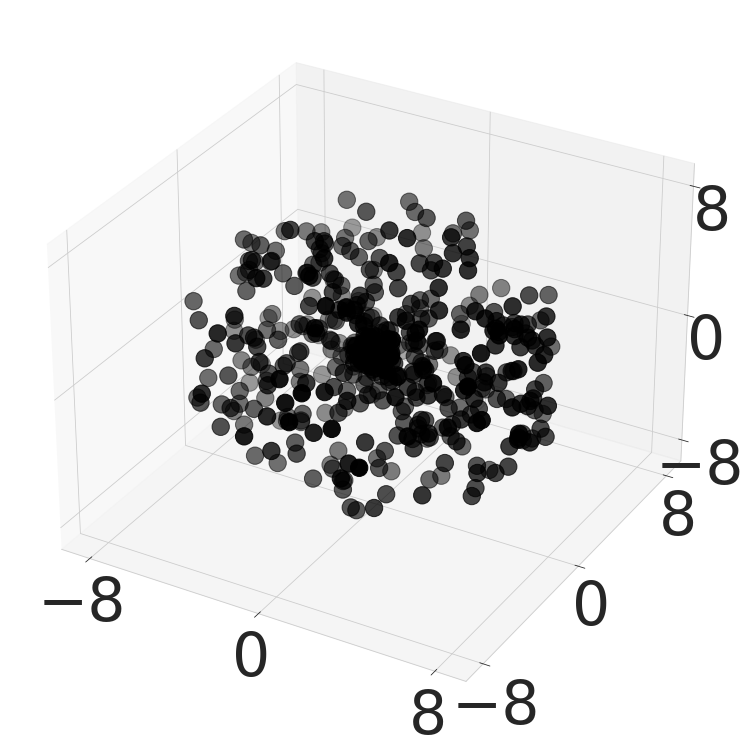

In [248]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
# ax = fig.add_subplot(projection='3d')
ax.scatter(all_cam_pos[:,0], all_cam_pos[:,1], all_cam_pos[:,2], marker = 'o', color = 'black', s = 300)
# ax.set_xlabel('X', size=20)
# ax.set_ylabel('Y', size=20)
# ax.set_zlabel('Z', size=20)

ax.set_xticks([-8, 0, 8])
ax.set_yticks([-8, 0, 8])
ax.set_zticks([-8, 0, 8])

ax.set_xlim(-9,9)
ax.set_ylim(-9,9)
ax.set_zlim(-9,9)


plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
ax.zaxis.set_tick_params(labelsize=60)

# plt.title('Camera positions', size=100)
plt.savefig('../plots/saved_fig/camera_pos_dist_%s_%s.pdf'%(arch,category), bbox_inches='tight')

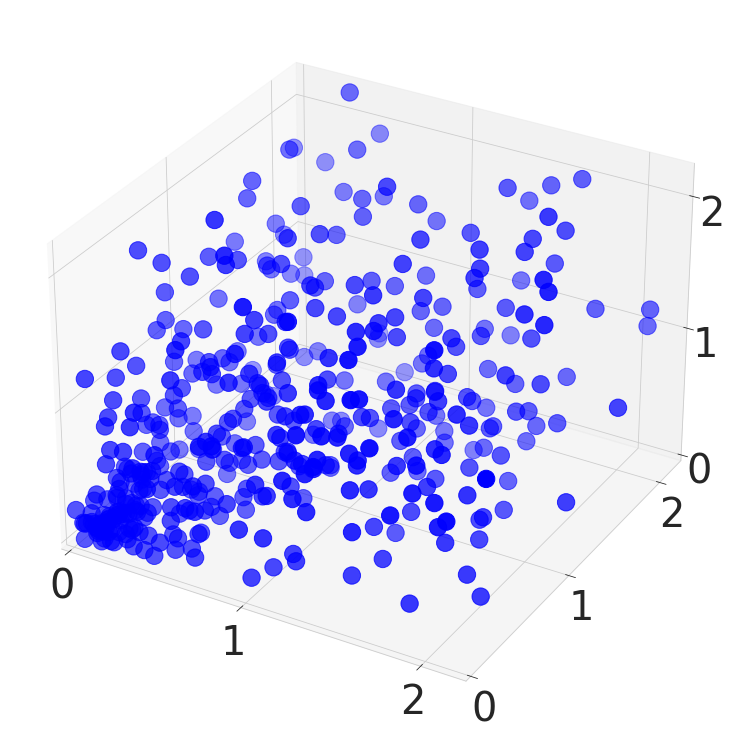

In [249]:
fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)
# ax = fig.add_subplot(projection='3d')
ax.scatter(all_look_at[:,0], all_look_at[:,1], all_look_at[:,2], marker = 'o', color = 'blue', s =300)
# ax.set_xlabel('X', size=60)
# ax.set_ylabel('Y', size=60)
# ax.set_zlabel('Z', size=60)

ax.set_xticks([0,1, 2])
ax.set_yticks([0,1, 2])
ax.set_zticks([0,1, 2])

ax.set_xlim(0, 2.2)
ax.set_ylim(0, 2.2)
ax.set_zlim(0, 2.2)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.zaxis.set_tick_params(labelsize=40)

# plt.title('Look at', size=100)
plt.savefig('../plots/saved_fig/camera_look_at_dist_%s_%s.pdf'%(arch,category), bbox_inches='tight')

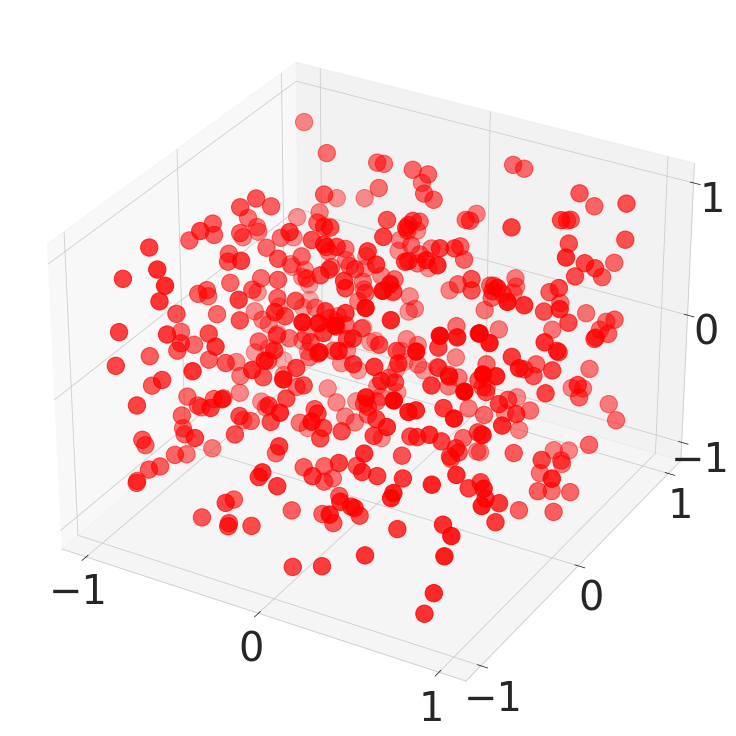

In [250]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

# ax = fig.add_subplot(projection='3d')
ax.scatter(all_up[:,0], all_up[:,1], all_up[:,2], marker = 'o', color = 'red', s = 300)
# ax.set_xlabel('X', size=20)
# ax.set_ylabel('Y', size=20)
# ax.set_zlabel('Z', size=20)


ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.zaxis.set_tick_params(labelsize=40)
# plt.title('Up vector', size = 100)
plt.savefig('../plots/saved_fig/camera_up_dist_%s_%s.pdf'%(arch,category), bbox_inches='tight')

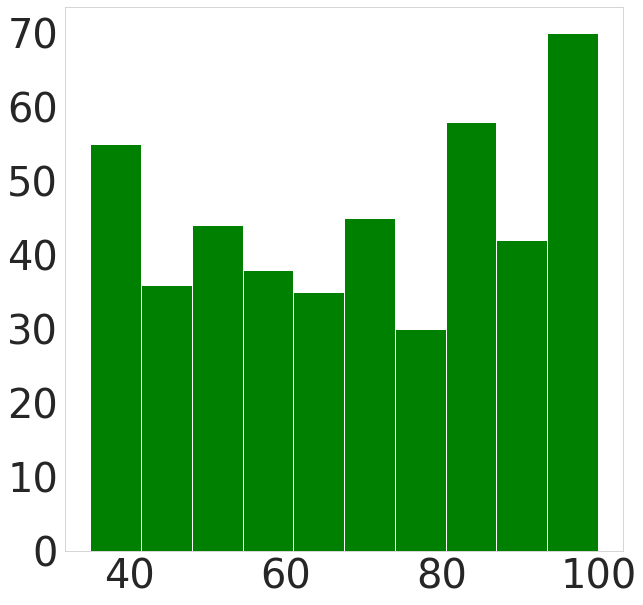

In [251]:
fig = plt.figure(figsize=(10,10))
plt.hist(all_fov, color = 'green')
# plt.title('Field of view', size = 100)

plt.xticks([40, 60, 80, 100], fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('../plots/saved_fig/camera_fov_dist_%s_%s.pdf'%(arch,category))

plt.show()
